# Part 2: Cleaning and preparing the data for modeling

## Executive Summary:

* The complete final data frame constructed from various sources and joined together represents one of the most key and important aspects of successfully completing this project. 


* The goal now is to just do a bit more preliminary cleaning, as well as explore the relationships and trends this data can offer. With such an accurate and rich source of data, there are almost a limitless number of options in doing EDA, so what I will do below perhaps will only represent a fraction of the visualisations that can be done with this data.

**Variables of Interest**

* The variables of interest are pretty much all of them, but for the sake of simplicity I have broken them up into what I believe are the most important and relevant categories to people looking at this data. They are:
    * Financial (rent, income, mortgage etc.)
    * Education (level of education etc.)
    * Cultural (marriage, religion etc.)
    * Electoral (postal votes, absent votes, turnout etc.)
    * Relationship (scatter plots between two features)
    * Trends (plotting data over the election time periods)
    * Party (select characteristics to compare party to party)
    
    
* All of these visualisations will be grouped by either by party or state

* To help me in my visualising I've written a lot of custom graphing functions that are in a module that I'll import into this notebook. This will make the notebook much easier to read.

## Preliminary cleaning:

* Because the party names and independent candidates are not organised properly or are mislabeled I will do a quick clean of the rows.


In [1]:
#importing necessary packages for EDA and cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing my custom module containing all my functions for specific graphs
from vizzo import graphy as gy
%matplotlib inline

In [2]:
#Adjusting display options for the data frames
pd.set_option('display.max_columns', None)
pd.set_option('display.min_rows',20)

In [3]:
#Reading in the completed joined data frame from my earlier SQL database
ced_df = pd.read_csv('./Database/CED_data.csv')

In [4]:
#Here I am defining the parties as either being left or right leaning, where 1 = right and 0 = left
party_dict = {
    'Australian Labor Party':0,
    'Liberal':1,
    'Liberal National Party':1,
    'The Nationals':1,
    'Liberal National Party of Queensland':1,
    'The Greens':0,
    'Independent':'Independent',
    'Katter\'s Australian Party':1,
    'CLP - The Territory Party':1,
    'Palmer United Party':1,
    'Centre Alliance':1,
    'Nick Xenophon Team':1,
    'Country Liberals (NT)':1,
    'Katter\'s Australian Party (KAP)':1,
}

In [5]:
#Looking up the independent party candidates, and manually identifying if they are left or right
ced_df[ced_df['partynm'] == 'Independent']

,divisionnm,divisionid,stateab,partyab,lncvotes,lncpercentage,alpvotes,alppercentage,totalvotes,swing,election_year,candidateid,givennm,surname,partynm,enrolment,turnout,turnoutpercentage,turnoutswing,ordinaryvotes,absentvotes,provisionalvotes,prepollvotes,postalvotes,totalpercentage,closeofrollsenrolment,notebookrolladditions,notebookrolldeletions,reinstatementspostal,reinstatementsprepoll,reinstatementsabsent,reinstatementsprovisional,year,ced,ced_state,census_year,rent_1_99_pct,rent_100_199_pct,rent_200_249_pct,rent_250_299_pct,rent_300_349_pct,rent_350_449_pct,rent_450_549_pct,rent_550_plus_pct,rent_not_stated_pct,rent_not_applicable_pct,income_negative_income_pct,income_nil_income_pct,income_1_299_pct,income_300_399_pct,income_400_799_pct,income_800_999_pct,income_1000_1249_pct,income_1250_1499_pct,income_1500_1999_pct,income_2000_plus_pct,income_not_stated_pct,income_not_applicable_pct,employed_worked_full_time_pct,employed_worked_part_time_pct,employed_away_from_work_pct,unemployed_looking_for_full_time_work_pct,unemployed_looking_for_part_time_work_pct,not_in_the_labour_force_pct,not_stated_pct,not_applicable_pct,non_indigenous_pct,aboriginal_pct,torres_strait_islander_pct,both_aboriginal_and_torres_strait_islander_pct,oceania_and_antarctica_nfd_pct,australia_includes_external_territories_pct,new_zealand_pct,melanesia_pct,micronesia_pct,polynesia_excludes_hawaii_pct,antarctica_pct,north_west_europe_nfd_pct,united_kingdom_pct,ireland_pct,western_europe_pct,northern_europe_pct,southern_and_eastern_europe_nfd_pct,southern_europe_pct,south_eastern_europe_pct,eastern_europe_pct,north_africa_and_the_middle_east_nfd_pct,north_africa_pct,middle_east_pct,south_east_asia_nfd_pct,mainland_south_east_asia_pct,maritime_south_east_asia_pct,north_east_asia_nfd_pct,chinese_asia_includes_mongolia_pct,japan_and_the_koreas_pct,southern_and_central_asia_nfd_pct,southern_asia_pct,central_asia_pct,americas_nfd_pct,northern_america_pct,south_america_pct,central_america_pct,caribbean_pct,sub_saharan_africa_nfd_pct,central_and_west_africa_pct,southern_and_east_africa_pct,agriculture_forestry_and_fishing_pct,mining_pct,manufacturing_pct,electricity_gas_water_and_waste_services_pct,construction_pct,wholesale_trade_pct,retail_trade_pct,accommodation_and_food_services_pct,transport_postal_and_warehousing_pct,information_media_and_telecommunications_pct,financial_and_insurance_services_pct,rental_hiring_and_real_estate_services_pct,professional_scientific_and_technical_services_pct,administrative_and_support_services_pct,public_administration_and_safety_pct,education_and_training_pct,health_care_and_social_assistance_pct,arts_and_recreation_services_pct,other_services_pct,inadequately_described_pct,hrswrkd_none_pct,hrswrkd_1_15_hours_pct,hrswrkd_16_24_hours_pct,hrswrkd_25_34_hours_pct,hrswrkd_35_39_hours_pct,hrswrkd_40_hours_pct,hrswrkd_41_48_hours_pct,hrswrkd_49_hours_and_over_pct,hrswrkd_not_stated_pct,hrswrkd_not_applicable_pct,worked_at_home_pct,walked_only_pct,train_pct,bus_pct,ferry_pct,tram_pct,taxi_pct,car_as_driver_pct,car_as_passenger_pct,truck_pct,motorbike_scooter_pct,bicycle_pct,other_pct,englishprof_very_well_pct,englishprof_well_pct,englishprof_not_well_pct,englishprof_not_at_all_pct,englishprof_not_stated___both_language_lanp_and_proficiency_eng,englishprof_not_stated___language_lanp_stated_proficiency_engp_,englishprof_not_applicable_pct,year_12_or_equivalent_pct,year_11_or_equivalent_pct,year_10_or_equivalent_pct,year_9_or_equivalent_pct,year_8_or_below_pct,did_not_go_to_school_pct,has_need_for_assistance_with_core_activities_pct,does_not_have_need_for_assistance_with_core_activities_pct,domesticwrk_nil_hours_pct,domesticwrk_less_than_5_hours_pct,domesticwrk_5_to_14_hours_pct,domesticwrk_15_to_29_hours_pct,domesticwrk_30_hours_or_more_pct,domesticwrk_not_stated_pct,domesticwrk_not_applicable_pct,buddhism_pct,christianity_pct,hinduism_pct,islam_pct,judaism_pct,other_religions_pct,no_religion_pct,never_married_pct,widowed_pct,divorc

In [6]:
#Here I am assigning the various independent candidates as either being left or right for the model
pol_ind = {
    73: 1,
    133:1,
    180:0,
    218:1,
    329:0,
    366:1,
    478:0,
    517:1,
    528:1,
    549:1,
    663:1,
    695:1,
    752:1,
    808:1,
    840:1
}

In [7]:
#Creating a new binary left/right identifier column by mapping the above party name dictionary
ced_df['is_right'] = ced_df['partynm'].map(party_dict)

In [8]:
#Now assigning my independents left/right binary identifier to any remaining independent row
for key,value in pol_ind.items():
    ced_df.loc[key,'is_right'] = value

In [9]:
#Converting all values to float
ced_df['is_right'] = ced_df['is_right'].apply(float)

In [10]:
#Checking the unique party names
ced_df['partynm'].value_counts()

Australian Labor Party                  390
Liberal                                 316
Liberal National Party                   66
The Nationals                            56
Liberal National Party of Queensland     20
Independent                              15
The Greens                                4
Katter's Australian Party                 2
CLP - The Territory Party                 2
Nick Xenophon Team                        1
Katter's Australian Party (KAP)           1
Country Liberals (NT)                     1
Palmer United Party                       1
Centre Alliance                           1
Name: partynm, dtype: int64

In [11]:
#Renaming the 'Liberal national party of queensland' party names to just LNP as they are the same party, just named
#different over different elections
lnq_mask = ced_df[ced_df['partynm'] == 'Liberal National Party of Queensland'].index

for mask in lnq_mask:
    ced_df.loc[mask,'partynm'] = 'Liberal National Party'

In [12]:
#Renaming country liberals to keep the naming consistent for all election years
clp_mask = ced_df[ced_df['partynm'] == 'CLP - The Territory Party'].index

for mask in clp_mask:
    ced_df.loc[mask,'partynm'] = 'Country Liberals (NT)'

In [13]:
#Renaming Centre Alliance to adjust for the party rename
nx_mask = ced_df[ced_df['partynm'] == 'Nick Xenophon Team'].index

ced_df.loc[nx_mask,'partynm'] = 'Centre Alliance'

In [14]:
#Renaming Katter party to keep it consistent
k_mask = ced_df[ced_df['partynm'] == 'Katter\'s Australian Party (KAP)'].index

ced_df.loc[k_mask,'partynm'] = 'Katter\'s Australian Party'

In [15]:
#Checking the unique party names again, looks all good now
ced_df['partynm'].value_counts()

Australian Labor Party       390
Liberal                      316
Liberal National Party        86
The Nationals                 56
Independent                   15
The Greens                     4
Katter's Australian Party      3
Country Liberals (NT)          3
Centre Alliance                2
Palmer United Party            1
Name: partynm, dtype: int64

In [16]:
#Defining a new list of columns i want to convert to percentages from the AEC election data
cols_to_pct = ['ordinaryvotes','absentvotes','provisionalvotes','prepollvotes','postalvotes']

In [17]:
#Looping through the columns to convert the raw counts into percentages
for col in cols_to_pct:
    ced_df[col + '_pct'] = (ced_df[col]/ced_df['totalvotes'])*100
    #Dropping the count columns when converted into percentages
    ced_df.drop(columns=col,inplace=True)
    
#Dropping the totalvotes column now that everything is a proportion
ced_df.drop(columns='totalvotes',inplace=True)

In [18]:
#Exporting the data for modelling later
ced_df.to_csv('./Database/CED_model.csv',index=False)

* Now with the cleaning out of the way, I will export it to a CSV file that will be used as the basis for all my modeling in the next section of this project.

## Exploratory Data Analysis:


* For my EDA party of this project, I will be generating a number of graphs that give some interesting insight into the various aspects of my final data set. For brevity and cleanliness I will be importing a custom module, containing function I have written. Their respective doc strings can give more information about their functionality. 


* The EDA will cover some interesting financial, educational, cultural, electoral, and party based insights. 

### Financial:

* Financial data covers rent, mortgage, and incomes. They will all be grouped by state or party. The purpose of these visualisations is to demonstrate how voters of certain parties have different financial characteristics than others, and can shed insight into what things may influence why certain electorates vote for certain parties.

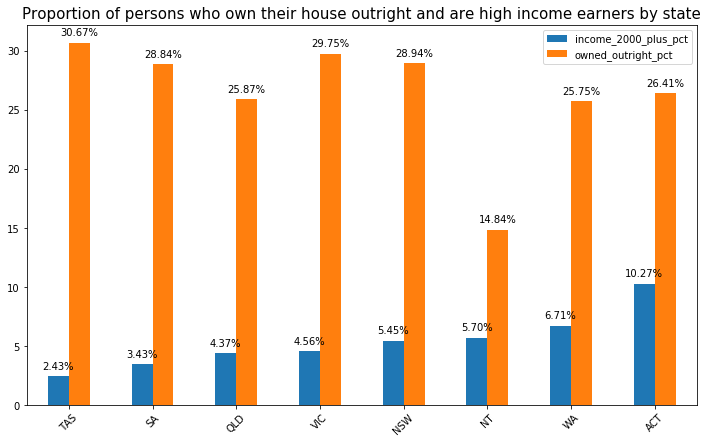

In [19]:
gy.fig_grapher(ced_df,'stateab',['income_2000_plus_pct','owned_outright_pct'],'Proportion of persons who own their house outright and are high income earners by state',sorter='income_2000_plus_pct')

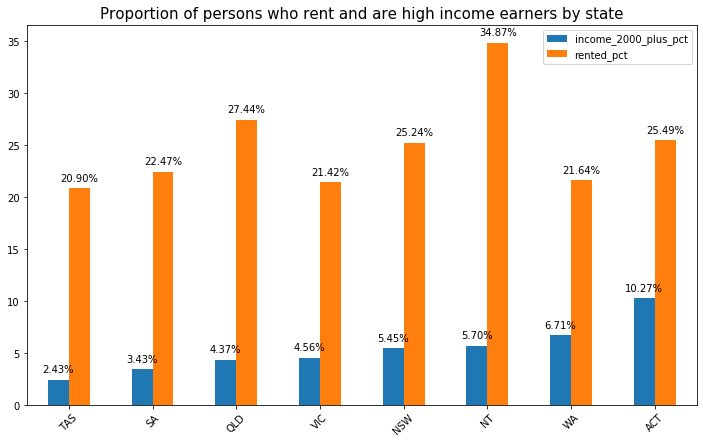

In [20]:
gy.fig_grapher(ced_df,'stateab',['income_2000_plus_pct','rented_pct'],'Proportion of persons who rent and are high income earners by state',sorter='income_2000_plus_pct')

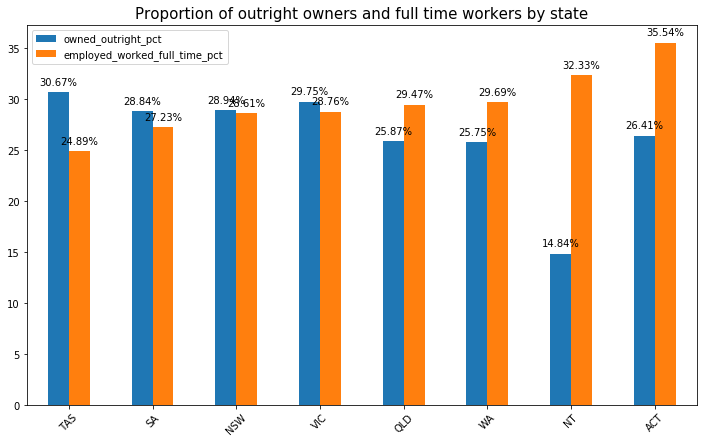

In [21]:
gy.fig_grapher(ced_df,'stateab',['owned_outright_pct','employed_worked_full_time_pct'],desc='Proportion of outright owners and full time workers by state',sorter='employed_worked_full_time_pct')

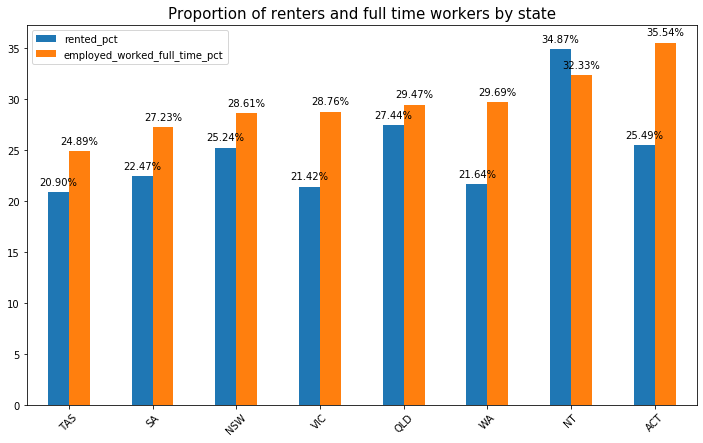

In [22]:
gy.fig_grapher(ced_df,'stateab',['rented_pct','employed_worked_full_time_pct'],desc='Proportion of renters and full time workers by state',sorter='employed_worked_full_time_pct')

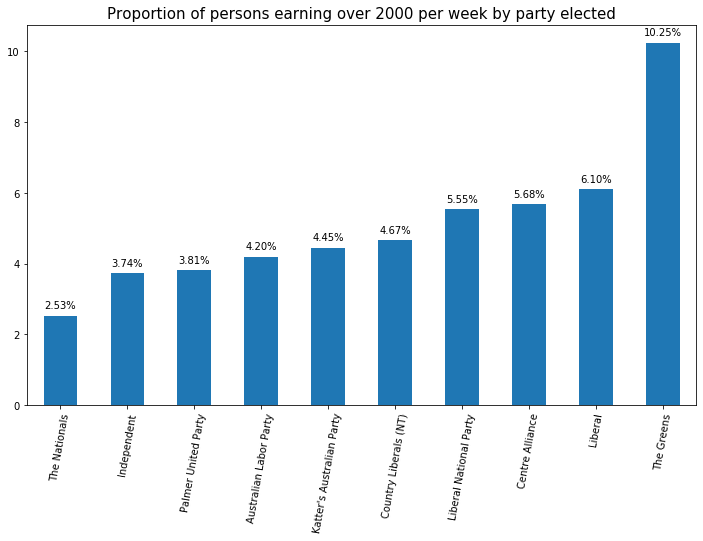

In [23]:
gy.fig_grapher(ced_df,'partynm',['income_2000_plus_pct'],'Proportion of persons earning over 2000 per week by party elected',rot=80)

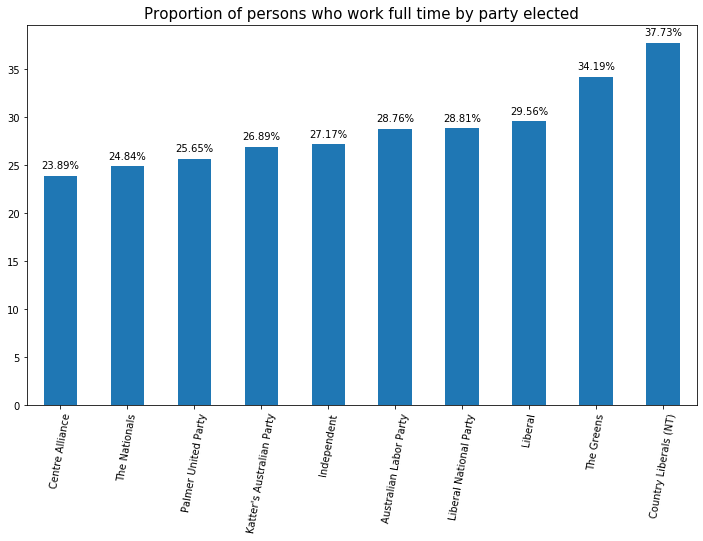

In [24]:
gy.fig_grapher(ced_df,'partynm',['employed_worked_full_time_pct'],desc='Proportion of persons who work full time by party elected',rot=80)

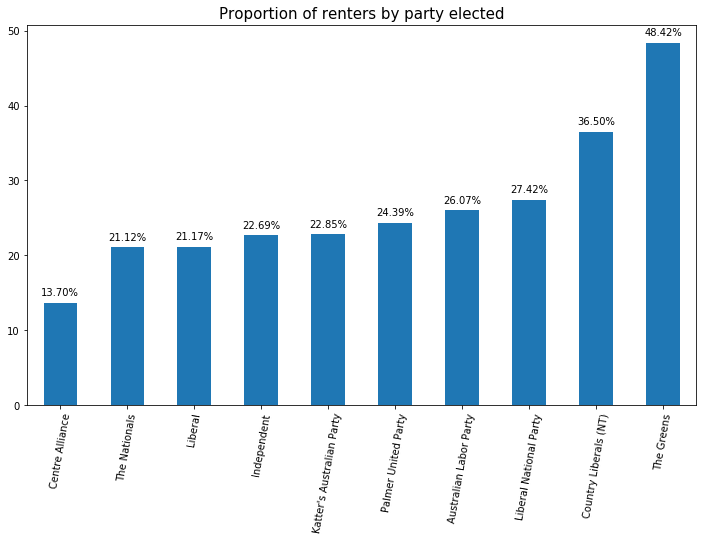

In [25]:
gy.fig_grapher(ced_df,'partynm',['rented_pct'],desc='Proportion of renters by party elected',rot=80)

* A few interesting insights from this; mainly that the electorates who vote for the greens have the highest proportion of renters, and are also the highest income earners. This is also due to the much smaller sample size and is perhaps more indicative of wealthier inner city demographics than greens demographics. 

* Another interesting insight is that Tasmania has the highest proportion of persons who own their house outright, while lagging behind in income and working hours. This tends to suggest that Tasmanians don't need to earn as much or as long to own a house eventually (lucky them).

### Education:

* Educational data covers people who have finished year 12, their education, proportion that have a bacehlor's degree, and the proportion of full time students in an electorate. They are grouped by state and party. 

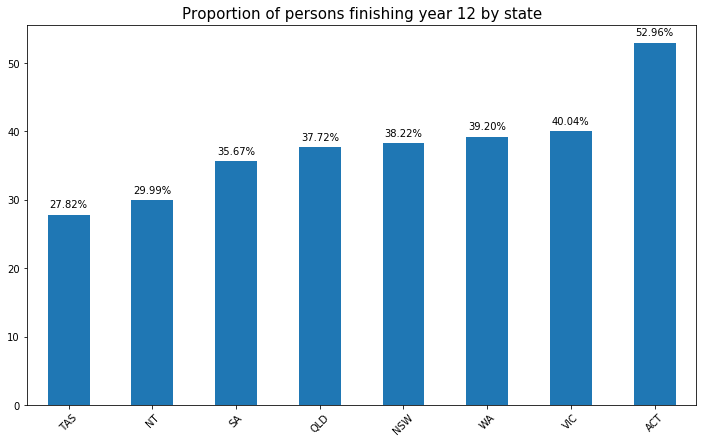

In [26]:
gy.fig_grapher(ced_df,'stateab',['year_12_or_equivalent_pct'],desc='Proportion of persons finishing year 12 by state')

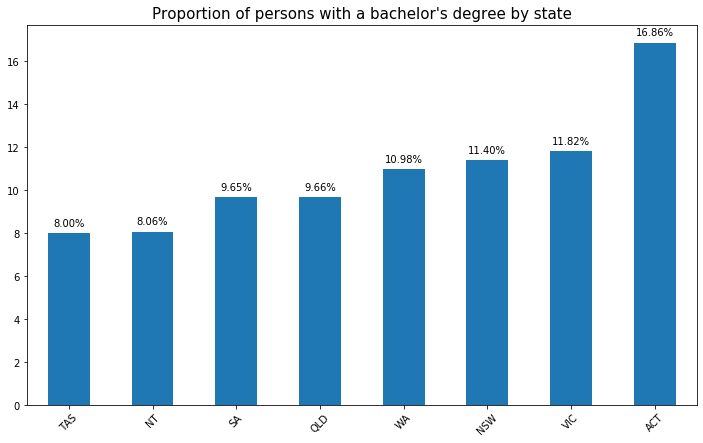

In [27]:
gy.fig_grapher(ced_df,'stateab',['bachelor_degree_level_pct'],desc='Proportion of persons with a bachelor\'s degree by state')

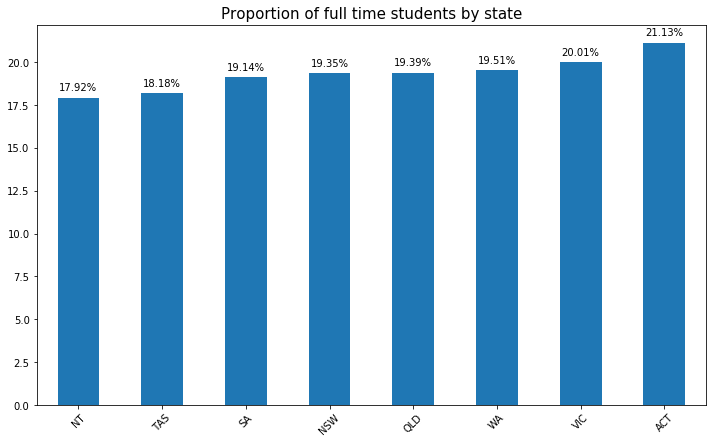

In [28]:
gy.fig_grapher(ced_df,'stateab',['full_time_student_pct'],desc='Proportion of full time students by state')

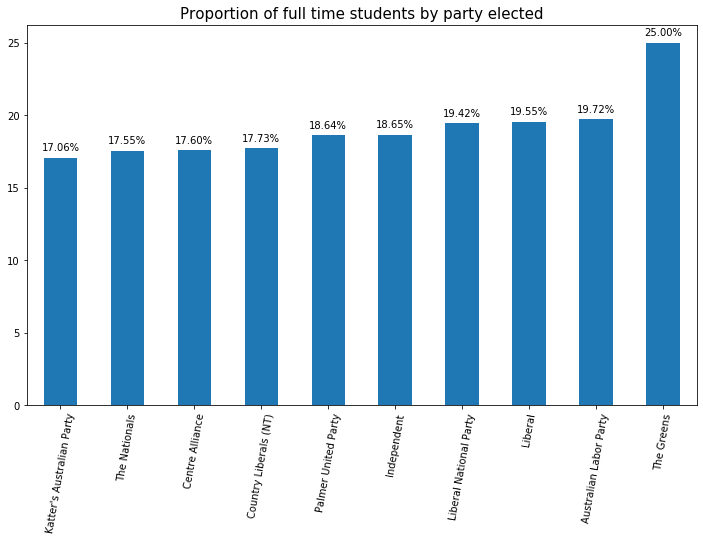

In [29]:
gy.fig_grapher(ced_df,'partynm',['full_time_student_pct'],desc='Proportion of full time students by party elected',rot=80)

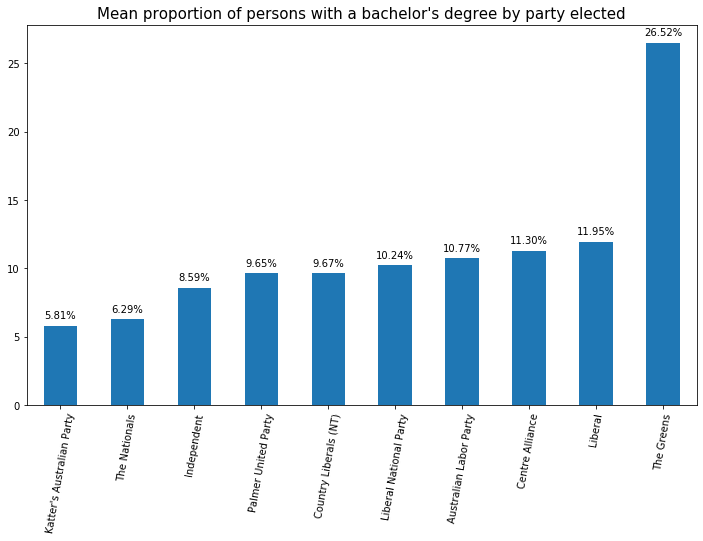

In [30]:
gy.fig_grapher(ced_df,'partynm',['bachelor_degree_level_pct'],desc='Mean proportion of persons with a bachelor\'s degree by party elected',rot=80)

* Not surprising that the greens have the highest proportion of persons with a bachelor degree voting for them. Although once again, this has a lot to do with the very small sample size of only 1 electorate, that more reflects the demographics of inner city Melbourne than greens voters as a whole. Nonetheless, it is definitely indicative of the types of demographic factors that influence whether a seat will vote for the Greens.


* The ACT also consistently tops out the list of states with high levels of education, being the state with the highest number of person who have finished year 12, with a bachelor's degree and number of full time students. This would also align with the high proportion of high income earners in the territory.

### Culture:

* Cultural data covers such things as religion, marriage, english proficiency, and age.

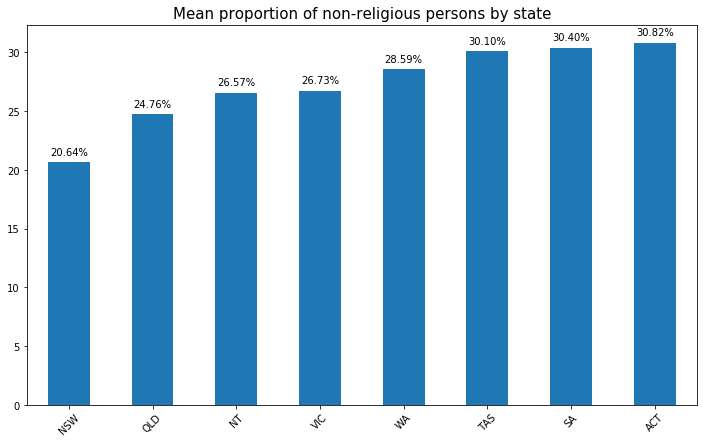

In [31]:
gy.fig_grapher(ced_df,'stateab',['no_religion_pct'],desc='Mean proportion of non-religious persons by state')

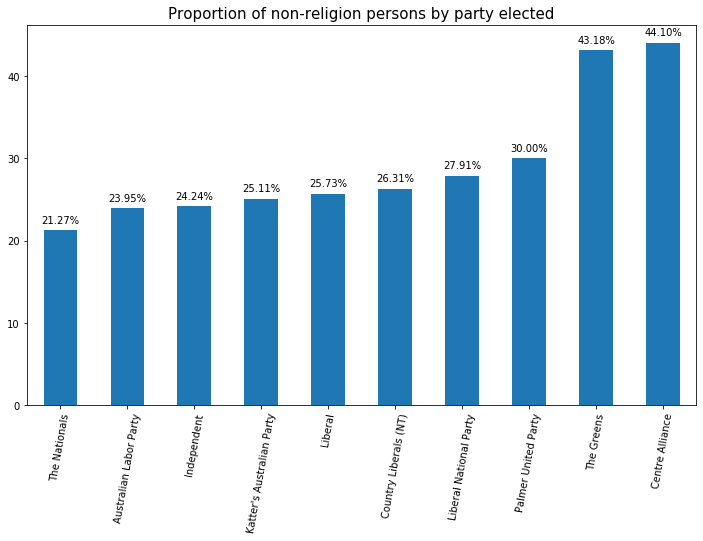

In [32]:
gy.fig_grapher(ced_df,'partynm',['no_religion_pct'],desc='Proportion of non-religion persons by party elected',rot=80)

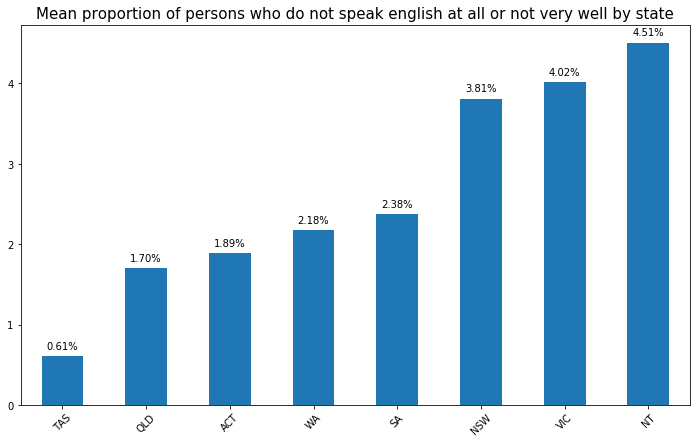

In [33]:
#Not writing this plot into a function as it is manually needing to combine two features from my data set
#This is combining english proficiency not well & not at all into one summed column for graphing, and plotting by state
ax1 = ced_df.groupby('stateab').mean()[['englishprof_not_well_pct','englishprof_not_at_all_pct']].sum(axis=1).sort_values().plot(kind='bar',figsize=(12,7))
gy.bar_labeller(ax1)
ax1.set_xticklabels(ced_df.groupby('stateab').mean()[['englishprof_not_well_pct','englishprof_not_at_all_pct']].sum(axis=1).sort_values().index,rotation = 45,fontsize = 10)
plt.title('Mean proportion of persons who do not speak english at all or not very well by state',fontsize=15)
plt.xlabel('')
plt.show()

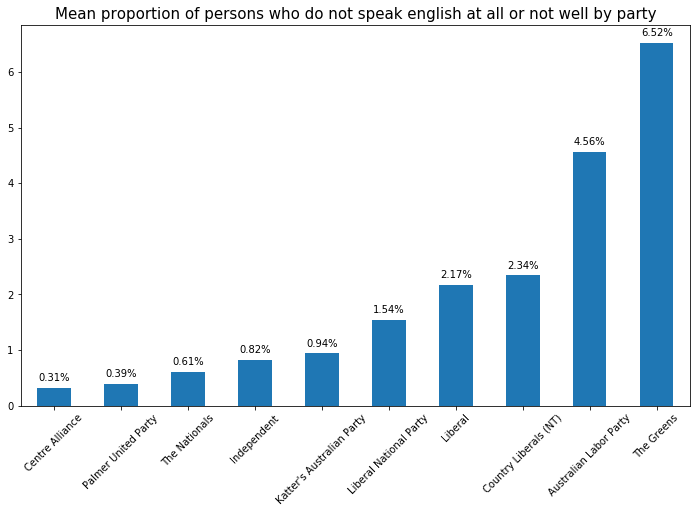

In [34]:
#Doing the same thing as above, except just plotting by party elected
ax2 = ced_df.groupby('partynm').mean()[['englishprof_not_well_pct','englishprof_not_at_all_pct']].sum(axis=1).sort_values().plot(kind='bar',figsize=(12,7))
gy.bar_labeller(ax2)
ax2.set_xticklabels(ced_df.groupby('partynm').mean()[['englishprof_not_well_pct','englishprof_not_at_all_pct']].sum(axis=1).sort_values().index,rotation = 45,fontsize = 10)
plt.title('Mean proportion of persons who do not speak english at all or not well by party',fontsize=15)
plt.xlabel('')
plt.show()

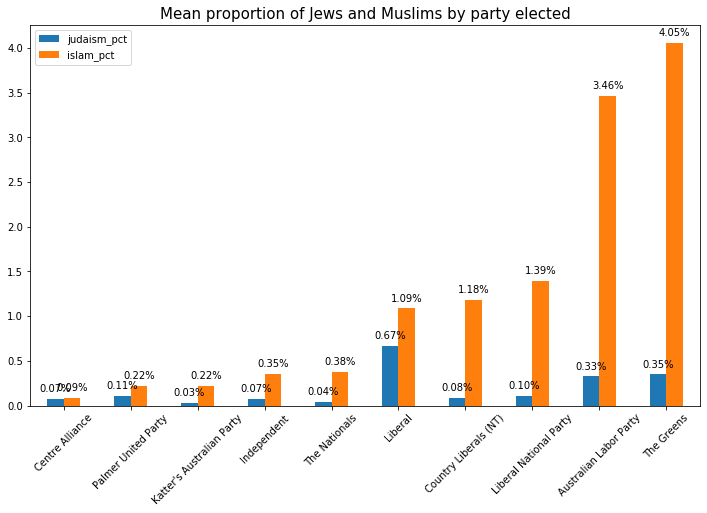

In [35]:
gy.fig_grapher(ced_df,'partynm',['judaism_pct','islam_pct'],sorter='islam_pct',desc='Mean proportion of Jews and Muslims by party elected')

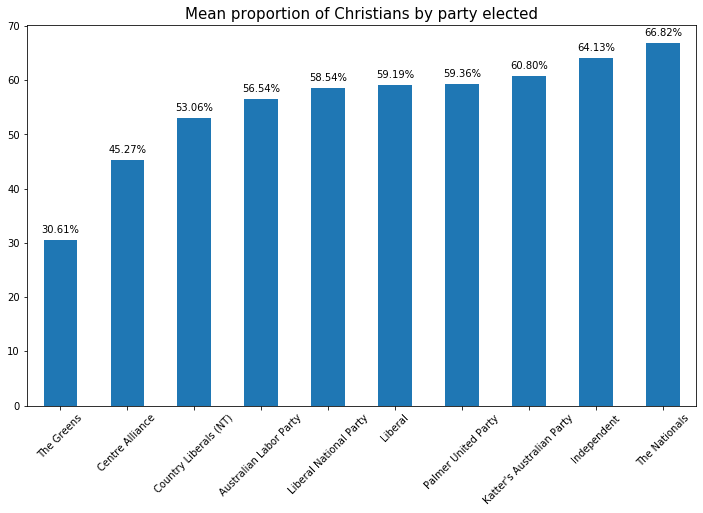

In [36]:
gy.fig_grapher(ced_df,'partynm',['christianity_pct'],desc='Mean proportion of Christians by party elected')

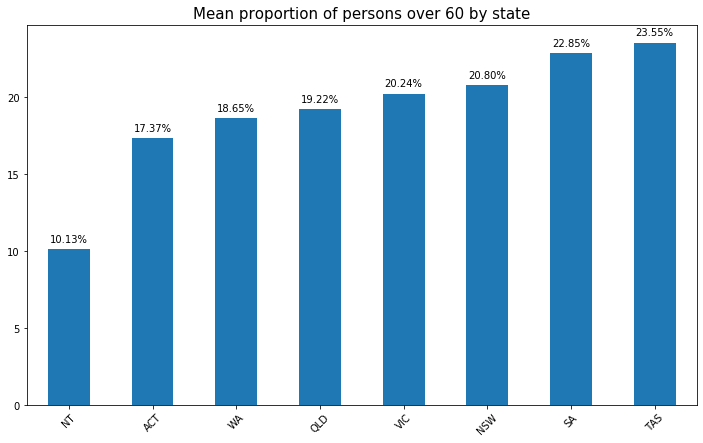

In [37]:
#Not writing this plot into a function, as I am creating a new column that sums of ages over 60 into one single column
#that gives the proportion of persons over 60 and grouping by state
plt.figure(figsize=(12,7))
ax = ced_df.groupby('stateab').mean()[[col for col in ced_df.columns if 'years' in col][12:]].sum(axis=1).sort_values().plot(kind='bar')
ax.set_xticklabels(ced_df.groupby('stateab').mean()[[col for col in ced_df.columns if 'years' in col][12:]].sum(axis=1).sort_values().index,rotation = 45,fontsize = 10)
gy.bar_labeller(ax)
plt.xlabel('')
plt.title('Mean proportion of persons over 60 by state',fontsize=15)
plt.show()

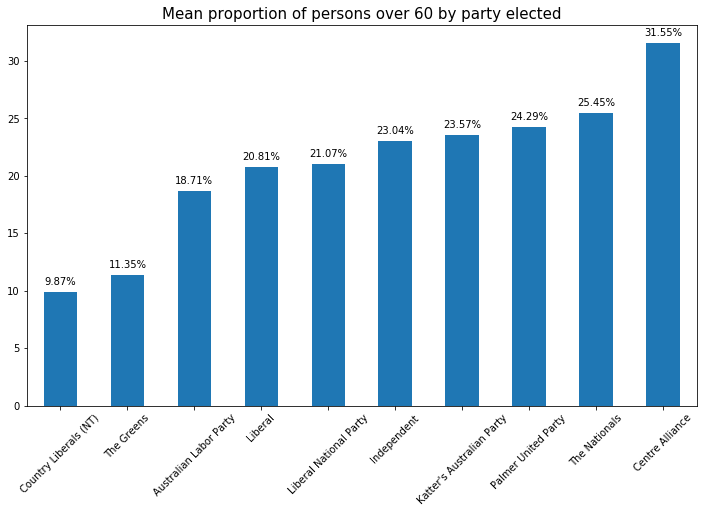

In [38]:
#Doing the same thing as above, except grouping by party elected
plt.figure(figsize=(12,7))
ax = ced_df.groupby('partynm').mean()[[col for col in ced_df.columns if 'years' in col][12:]].sum(axis=1).sort_values().plot(kind='bar')
ax.set_xticklabels(ced_df.groupby('partynm').mean()[[col for col in ced_df.columns if 'years' in col][12:]].sum(axis=1).sort_values().index,rotation = 45,fontsize = 10)
gy.bar_labeller(ax)
plt.xlabel('')
plt.title('Mean proportion of persons over 60 by party elected',fontsize=15)
plt.show()

* Surprisingly the electorates that voted for the Centre Alliance had the highest proportion of voters over the age of 60 by a surprisingly large margin over the next oldest being The Nationals. Tasmania also took out the oldest state, having the highest proportion of person over 60.

* For religion, the Nationals had the highest proportion of Christians, while the Greens had the highest proportion of Muslims and the Liberals had the highest proportion of Jews. Interesting to see how religion influences voting patterns.

### Elections:

* Election data covers, turnout, postal votes, absent votes, total seats won by left/right leaningness and total seats won by party.

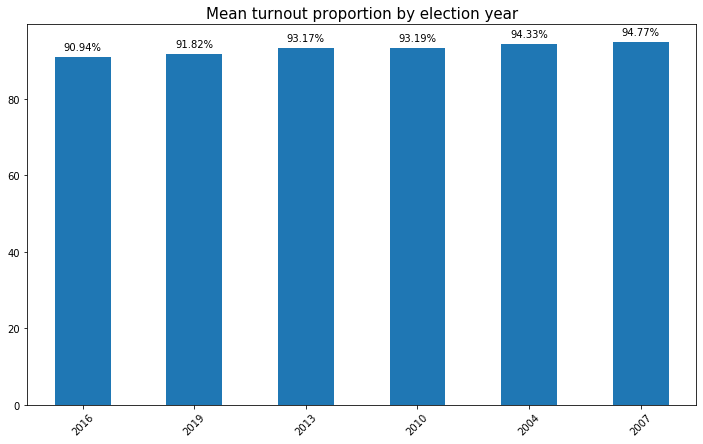

In [39]:
gy.fig_grapher(ced_df,'year',['turnoutpercentage'],desc='Mean turnout proportion by election year')

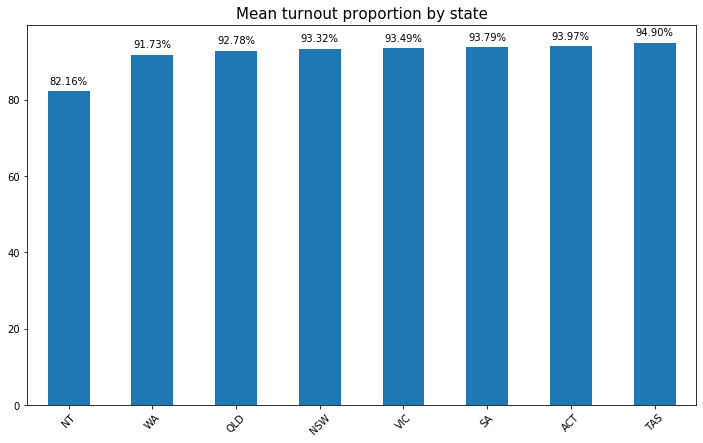

In [40]:
gy.fig_grapher(ced_df,'stateab',['turnoutpercentage'],desc='Mean turnout proportion by state')

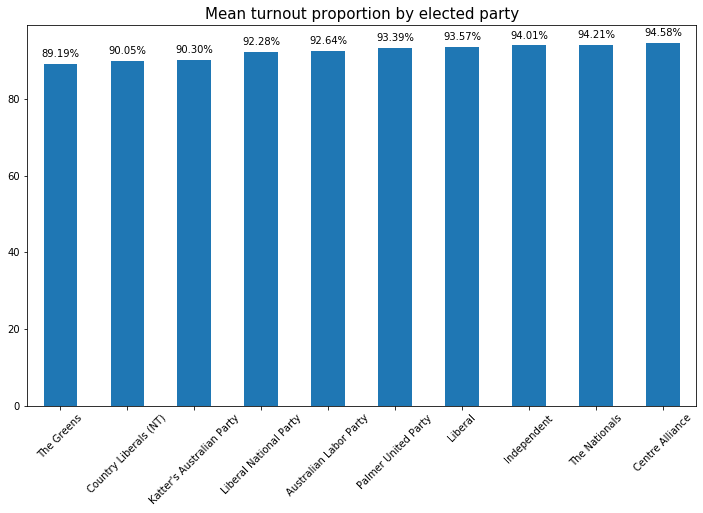

In [41]:
gy.fig_grapher(ced_df,'partynm',['turnoutpercentage'],desc='Mean turnout proportion by elected party')

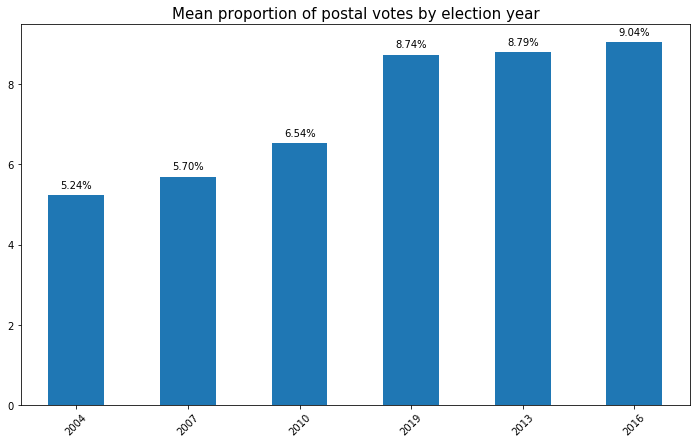

In [42]:
gy.fig_grapher(ced_df,'year',['postalvotes_pct'],desc='Mean proportion of postal votes by election year')

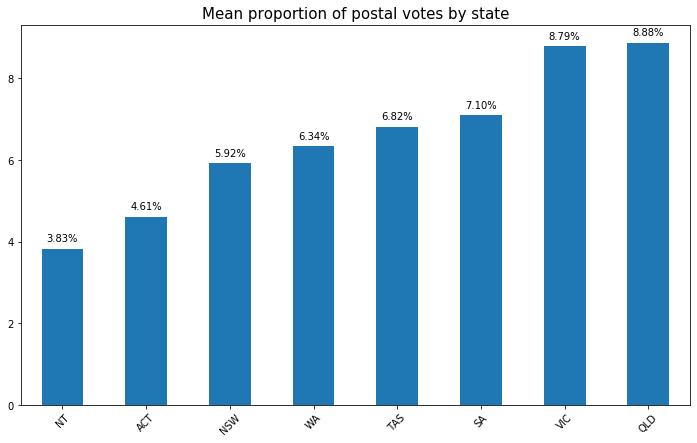

In [43]:
gy.fig_grapher(ced_df,'stateab',['postalvotes_pct'],desc='Mean proportion of postal votes by state')

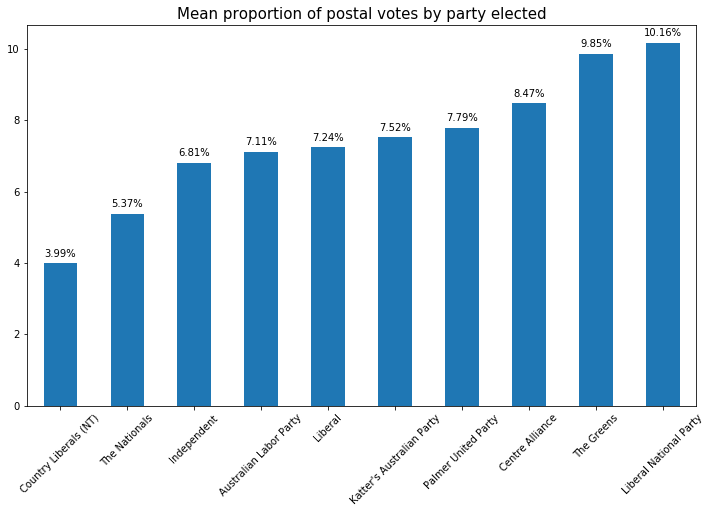

In [44]:
gy.fig_grapher(ced_df,'partynm',['postalvotes_pct'],desc='Mean proportion of postal votes by party elected')

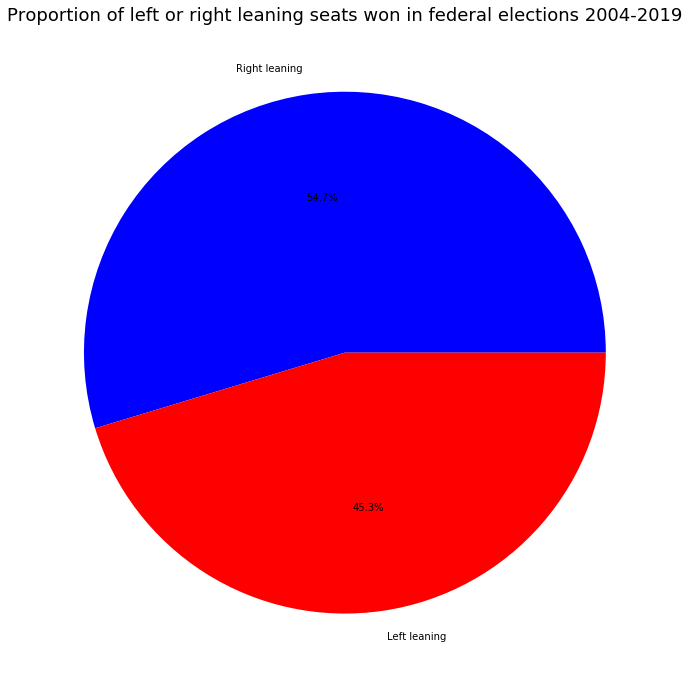

In [45]:
#Plotting the value counts of all seats into a pie chart
plt.figure(figsize=(12,12))
plt.pie(ced_df['is_right'].value_counts(),labels=['Right leaning','Left leaning'],colors=['blue','red'],autopct='%1.1f%%')
plt.title('Proportion of left or right leaning seats won in federal elections 2004-2019',fontsize=18)
plt.show()

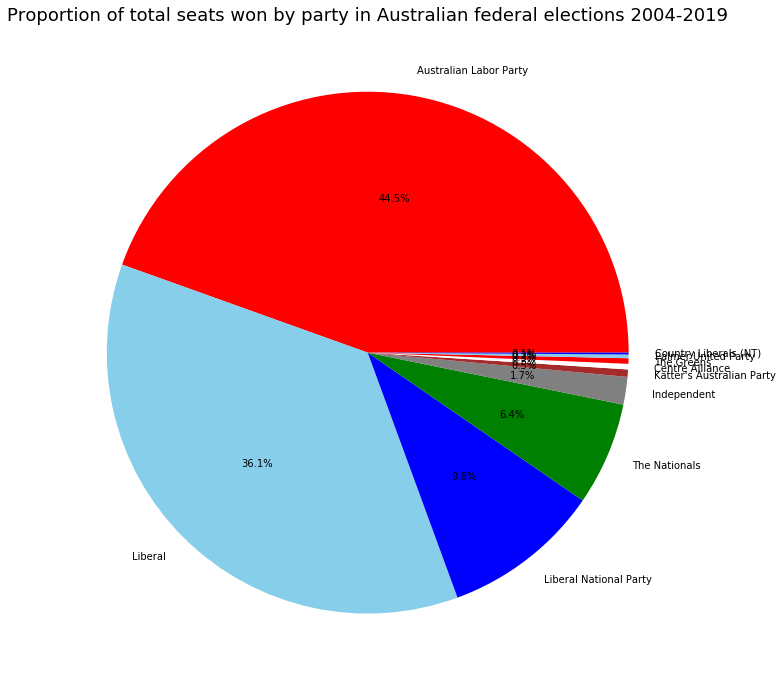

In [46]:
#Plotting the value counts of all seats into a pie chart
plt.figure(figsize=(12,12))
plt.pie(ced_df['partynm'].value_counts(),labels=ced_df['partynm'].unique(),colors=['red','skyblue','blue','green','grey','brown','white'],autopct='%1.1f%%')
plt.title('Proportion of total seats won by party in Australian federal elections 2004-2019',fontsize=18)
plt.show()

* Interestingly enough, since 2004 Australia has voted for more right leaning seats than left leaning, and while the Labor Party is the single largest party in terms of seats, clearly the unity of the coalition is what has kept it in power for so long. 

* In terms of differences in how certain electorates vote based on party, there is minimal difference. The major difference is geographic, with a higher degree of variance when grouped by state. With Queensland having more than double the amount of postal votes than the Northern Territory.

### Plotting relationships between features:

* This section will cover a variety of scatter plots that explore the relationship between various features. These are chosen based on their correlation, and can offer some interesting theories as to why this correlation exists.

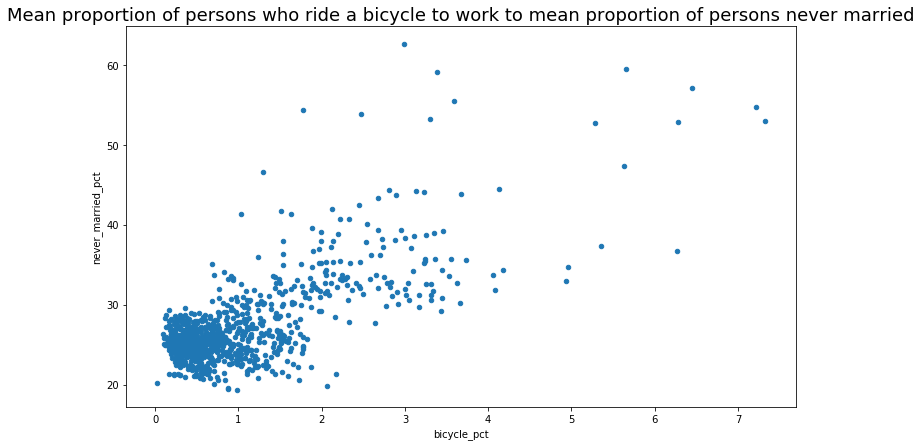

In [47]:
#Plotting the data via scatter plots to demonstrate how certain features move with others
ced_df.plot.scatter(x='bicycle_pct',y='never_married_pct',figsize=(12,7))
plt.title('Mean proportion of persons who ride a bicycle to work to mean proportion of persons never married',fontsize=18)
plt.show()

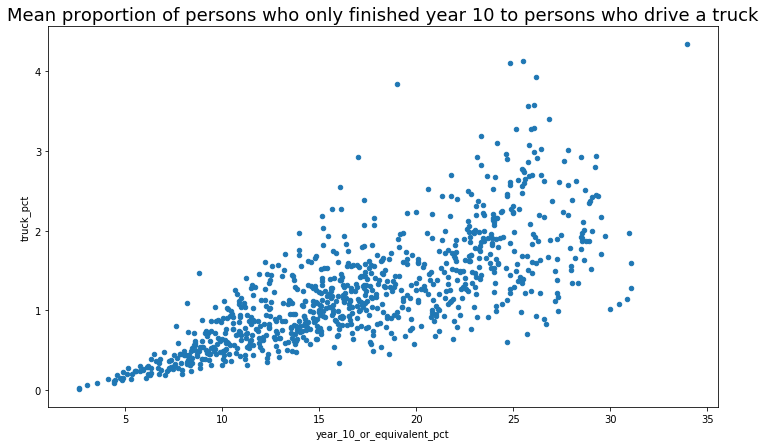

In [48]:
#Plotting the data via scatter plots to demonstrate how certain features move with others
ced_df.plot.scatter(x='year_10_or_equivalent_pct',y='truck_pct',figsize=(12,7))
plt.title('Mean proportion of persons who only finished year 10 to persons who drive a truck',fontsize=18)
plt.show()

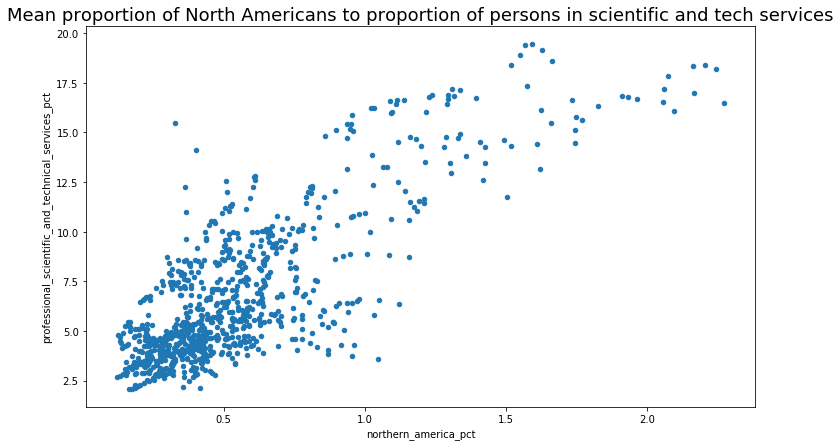

In [49]:
#Plotting the data via scatter plots to demonstrate how certain features move with others
ced_df.plot.scatter(x='northern_america_pct',y='professional_scientific_and_technical_services_pct',figsize=(12,7))
plt.title('Mean proportion of North Americans to proportion of persons in scientific and tech services',fontsize=18)
plt.show()

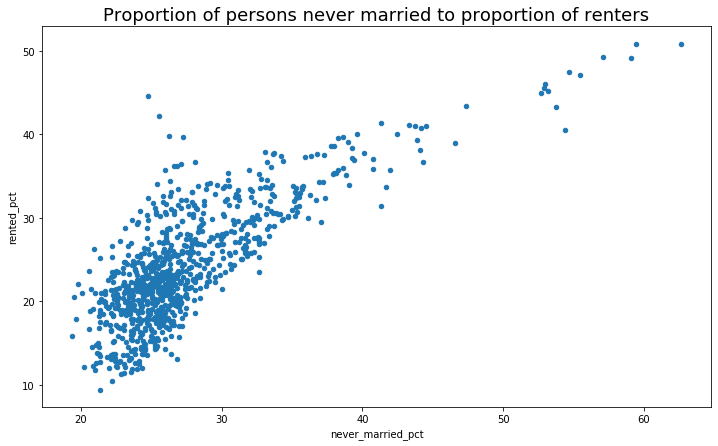

In [50]:
#Plotting the data via scatter plots to demonstrate how certain features move with others
ced_df.plot.scatter(x='never_married_pct',y='rented_pct',figsize=(12,7))
plt.title('Proportion of persons never married to proportion of renters',fontsize=18)
plt.show()

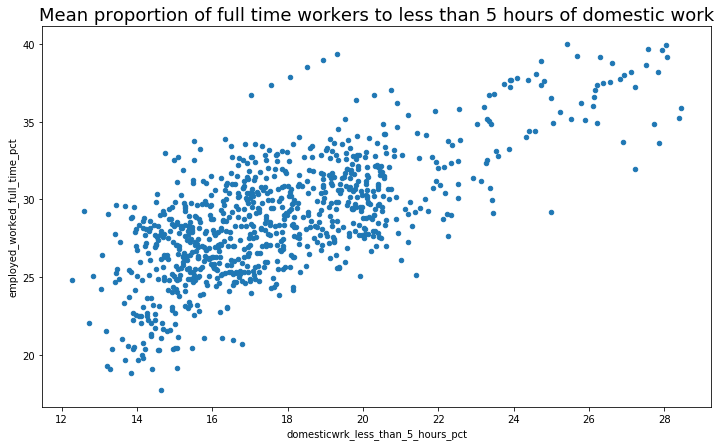

In [51]:
#Plotting the data via scatter plots to demonstrate how certain features move with others
ced_df.plot.scatter(x='domesticwrk_less_than_5_hours_pct',y='employed_worked_full_time_pct',figsize=(12,7))
plt.title('Mean proportion of full time workers to less than 5 hours of domestic work',fontsize=18)
plt.show()

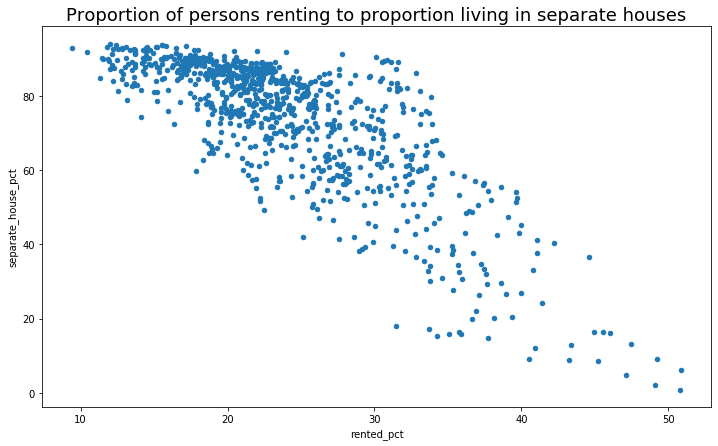

In [52]:
#Plotting the data via scatter plots to demonstrate how certain features move with others
ced_df.plot.scatter(x='rented_pct',y='separate_house_pct',figsize=(12,7))
plt.title('Proportion of persons renting to proportion living in separate houses',fontsize=18)
plt.show()

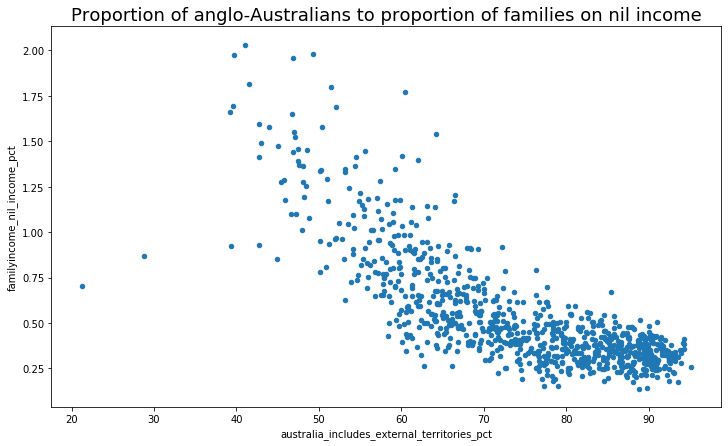

In [53]:
#Plotting the data via scatter plots to demonstrate how certain features move with others
ced_df.plot.scatter(x='australia_includes_external_territories_pct',y='familyincome_nil_income_pct',figsize=(12,7))
plt.title('Proportion of anglo-Australians to proportion of families on nil income',fontsize=18)
plt.show()

* This section is perhaps the most interesting and surprising. A few surprising relationships here; first, was how strongly proportion of renters negatively correlates with proportion of persons who live in separate houses, suggesting that people who do live in separate houses either own it with a mortgage or outright. 

* Another surprising relationship was the correlation between persons who only finished year 10 and persons who own a truck. This tends to make sense as persons who only finished year 10 would more likely be pursuing a vocational trade, and trucks are vital in being a tradesman.

## Trends:

* Trends are simply line plots that see how certain features have changed over the various elections.

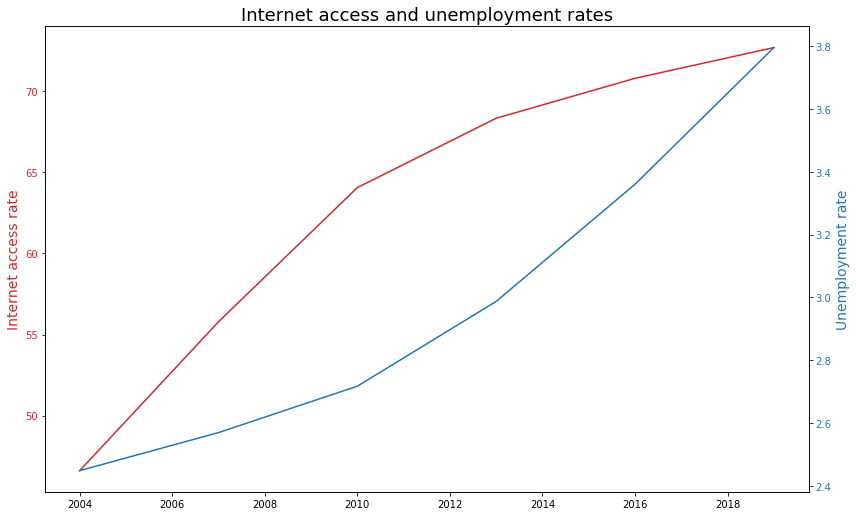

In [54]:
d1 = ced_df.groupby('year').mean()['internet_accessed_from_dwelling_pct']
d2 = ced_df.groupby('year').mean()[['unemployed_looking_for_full_time_work_pct','unemployed_looking_for_part_time_work_pct']].sum(axis=1)

#The two line grapher function, plots two different features on different axes, is useful in showing how two different
#features have grown on a similar scale
gy.two_line_grapher(d1,d2,'Internet access rate','Unemployment rate','Internet access and unemployment rates')

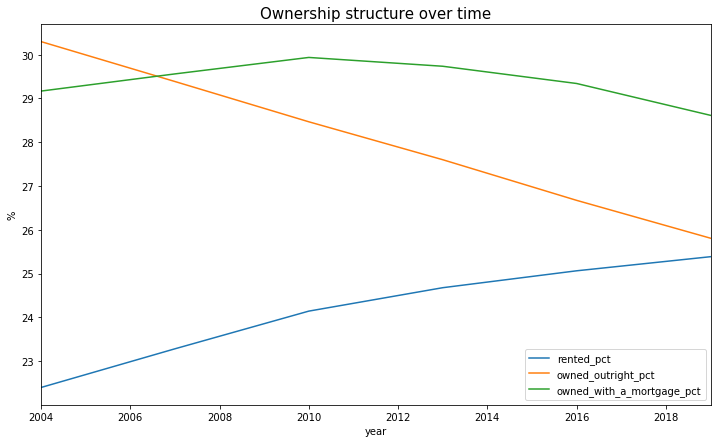

In [55]:
#Showing how ownership structure of housing has changed over the various election years
ced_df.groupby('year').mean()[['rented_pct','owned_outright_pct','owned_with_a_mortgage_pct']].plot(figsize=(12,7))
plt.ylabel('%',fontsize=10)
plt.title('Ownership structure over time',fontsize=15)
plt.show()

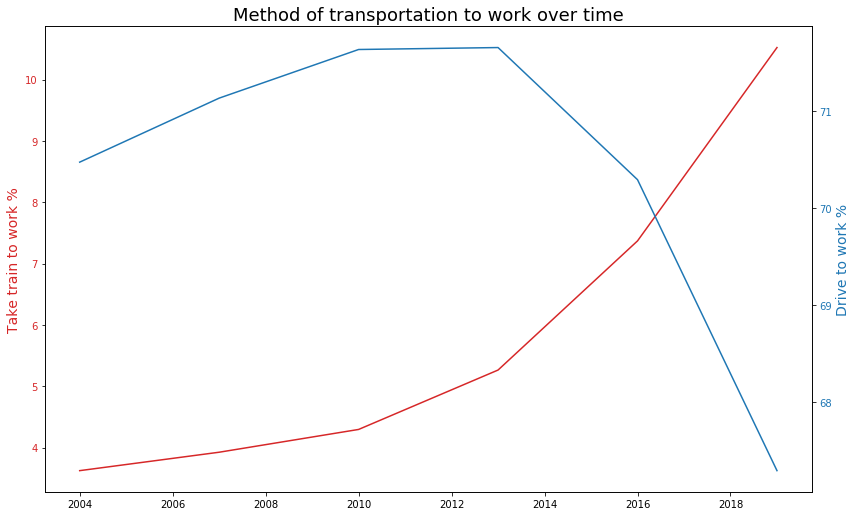

In [56]:
b1 = ced_df.groupby('year').mean()[['train_pct']]
b2 = ced_df.groupby('year').mean()[['car_as_driver_pct']]

#Comparing how public and private transport usage has changed over the election years
gy.two_line_grapher(b1,b2,t1='Take train to work %',t2='Drive to work %',title='Method of transportation to work over time')

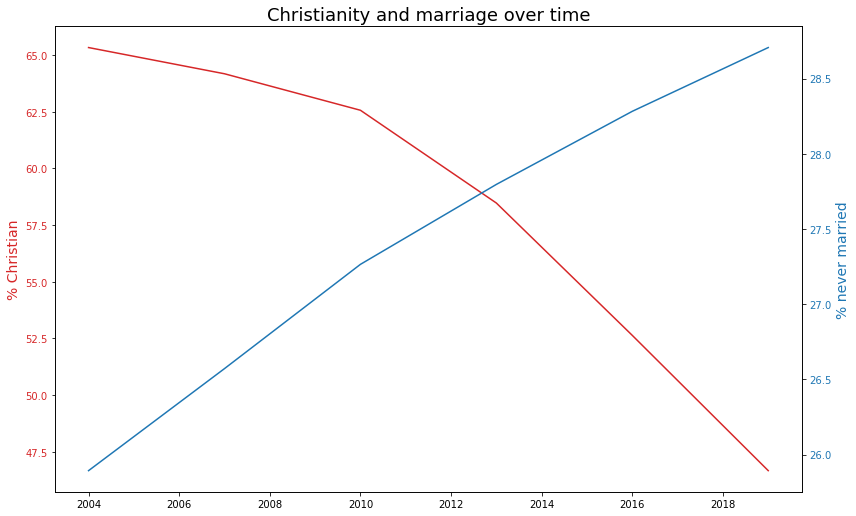

In [57]:
h1 = ced_df.groupby('year').mean()['christianity_pct']
h2 = ced_df.groupby('year').mean()['never_married_pct']

#Comparing how christianty and marriage rates have changed over the years
gy.two_line_grapher(h1,h2,'% Christian','% never married','Christianity and marriage over time')

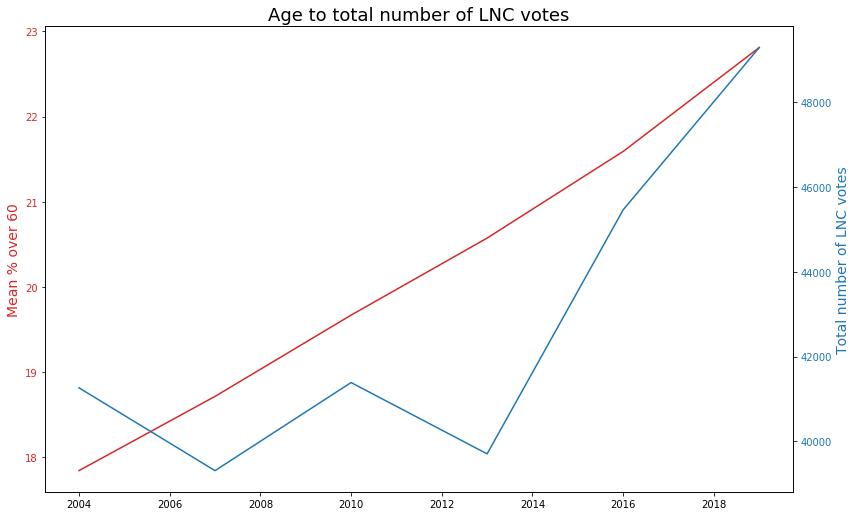

In [58]:
o1 = ced_df.groupby('year').mean()[[col for col in ced_df.columns if 'years' in col][12:]].sum(axis=1)
o2 = ced_df.groupby('year').mean()['lncvotes']

#Comparing how total number of LNC votes and the proportion of persons over 60 has changed
gy.two_line_grapher(o1,o2,'Mean % over 60','Total number of LNC votes','Age to total number of LNC votes')

* I also really like this section as it gives a pretty good view of how things have changed in Australia over time, and how certain features move with one another. 

* As many people would unsurprisingly know already, owning your property outright or even with a mortgage has become more and more rare, while renting has become more and more common as people become priced out of the housing market. 

* Another interesting bit of information was how public transport usage has tended upwards, while private car usage has tended downwards. This is a promising sign for our greenhouse emissions.

### Party Characteristics:

* Finally this section takes a select amount of demographic stats, and aims to plot the various different parties to compare how the same demographic statistics vary across party.

In [59]:
#Creating a list of predefined features that I want to graph to compare different demographics of the parties
feats_to_graph = ['year_12_or_equivalent_pct','couple_family_with_children_pct','owned_with_a_mortgage_pct',
                  'rented_pct','employed_worked_full_time_pct','no_religion_pct']

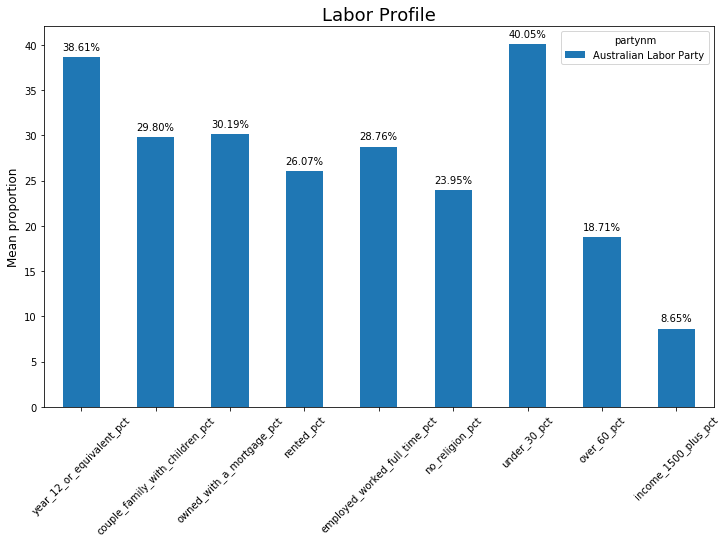

In [60]:
#Calling my party profiler function that will graph the above features, here i am only doing it for one party
gy.party_profiler(ced_df,feats_to_graph,['Australian Labor Party'],title='Labor Profile',label=True)

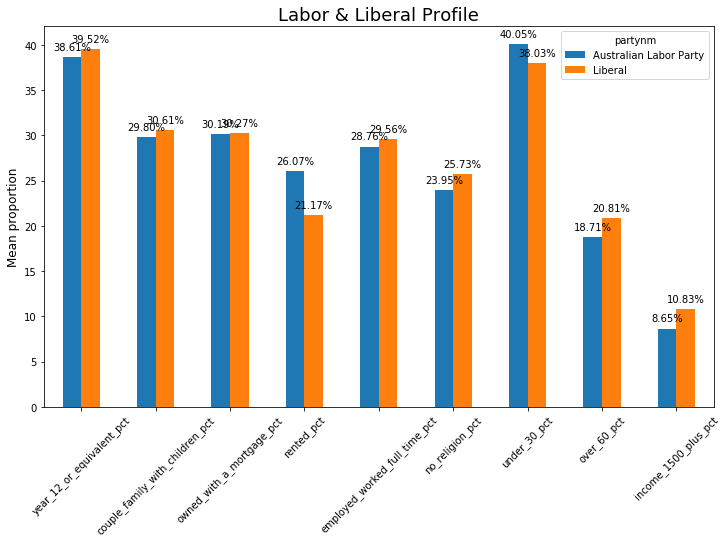

In [61]:
#Calling the same function, but for two parties for comparison
gy.party_profiler(ced_df,feats_to_graph,['Australian Labor Party','Liberal'],title='Labor & Liberal Profile',label=True)

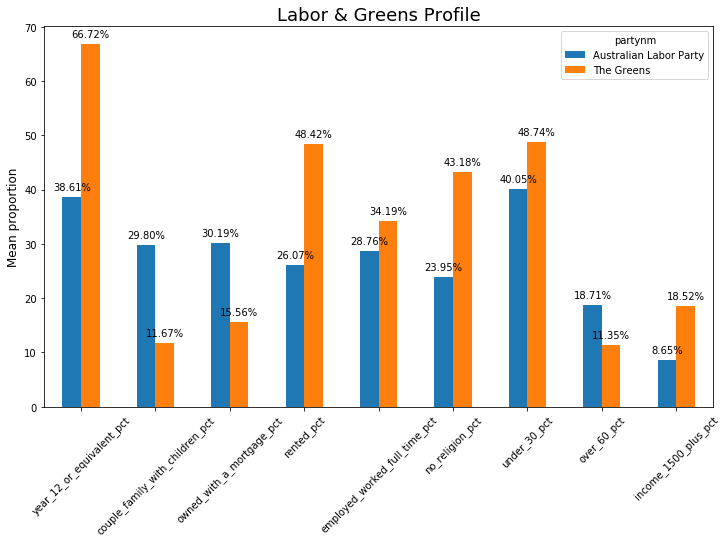

In [62]:
gy.party_profiler(ced_df,feats_to_graph,['Australian Labor Party','The Greens'],title='Labor & Greens Profile',label=True)

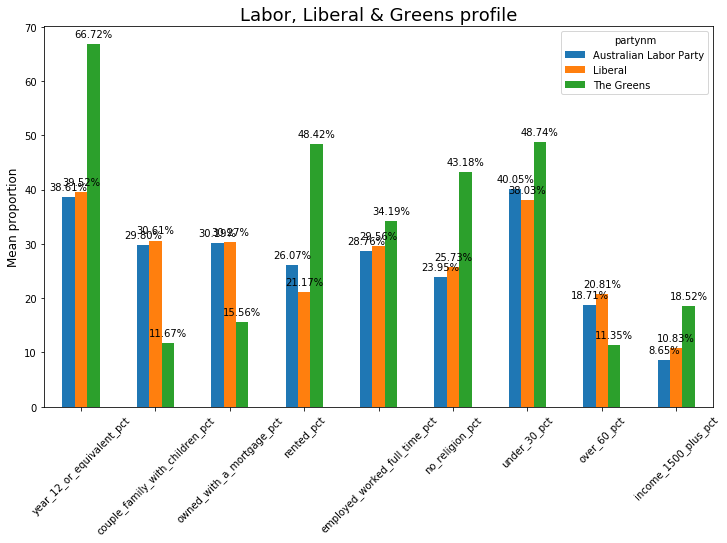

In [63]:
#Calling the same function, but for three parties
gy.party_profiler(ced_df,feats_to_graph,['Australian Labor Party','Liberal','The Greens'],title='Labor, Liberal & Greens profile',label=True)

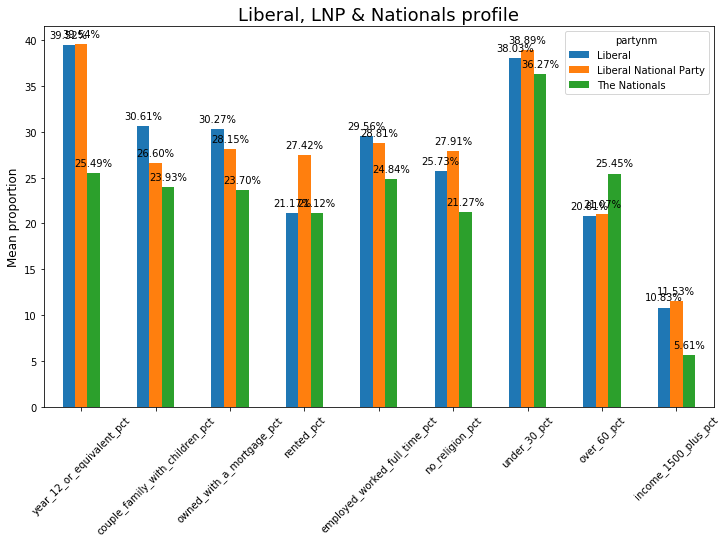

In [64]:
gy.party_profiler(ced_df,feats_to_graph,['Liberal','Liberal National Party','The Nationals'],title='Liberal, LNP & Nationals profile',label=True)

* Perhaps the most interesting thing to gleam from this, is how little the variance is between Liberal and Labor's demographic statistics. This tends to suggest that there isn't too much that separates the voting patterns of constituents who vote Labor/Liberal. Another interesting point is that the demographics are far more variant between the Labor party and The Greens than the Labor party and the Liberals.


* Another interesting point, is that the Nationals are very similar to the LNP and the Liberals except for education, where they lag behind. This makes sense as education is not as easily available in rural areas, but an interesting point nonetheless.